# 5. CNN

## 概要

本演習では以下の３つの演習を行います。

1. TensorFlow を用いた各種正規化の実装
2. 画像データに対する畳み込みなどの演算を行列積として行うため、 im2col と col2im の実装
3. im2col と col2im を用いて CNN ネットワークの実装、および学習

なお、予め用意されたコードはそのまま使用し、指示された穴埋め部を編集してください。演習問題文は<font color="Red">赤字</font>です。

このファイルは必ず最後までコードをすべて実行し、「最後までコードが実行可能」・「学習結果の出力がある」・「学習が成功している」の３つを満たした状態で提出してください。

所要時間：<font color="Red">5~8時間</font>

### 【Google colabのみ実行】ライブラリのインストール

必要なライブラリのインストールと、実行環境のバージョンを統一します。<br>

使用するライブラリ名とバージョンは配布資料の<font color=Red>「requirements.txt」</font>で確認できます。

※以下のセルを実行しましたら、「ランタイム」→「ランタイムを再起動」により<font color=Red>再起動</font>を行ってください。

In [1]:
import sys
# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # ライブラリのインストール
    !pip install tensorflow==2.8.0
else:
    print("Not Google Colab")

Not Google Colab


### ライブラリのインポート

必要なライブラリをインポートします。エラーになる場合は該当するものをインストールしてください。

In [2]:
import os
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn import datasets
from sklearn.model_selection import train_test_split

%matplotlib inline
# 乱数シードを指定
np.random.seed(seed=0)
# 表示する桁数を指定
np.set_printoptions(precision=4, floatmode='fixed')

## 1. バッチ正規化・レイヤー正規化・インスタンス正規化

サンプル数 N=2  
チャンネル数 C=3  
縦幅 H=5  
横幅 W=5  
のテンソルを用いて、それぞれの正規化手法の出力結果を比較します。

今回は、学習時の挙動を確認してみましょう。

In [3]:
# 入力テンソルの準備
input_tensor = tf.constant(
       [[[[-1.5256, -0.7502, -0.6540, -1.6095, -0.1002],
          [-0.6092, -0.9798, -1.6091, -0.7121,  0.3037],
          [-0.7773, -0.2515, -0.2223,  1.6871,  0.2284],
          [ 0.4676, -0.6970, -1.1608,  0.6995,  0.1991],
          [ 0.8657,  0.2444, -0.6629,  0.8073,  1.1017]],

         [[-0.1759, -2.2456, -1.4465,  0.0612, -0.6177],
          [-0.7981, -0.1316,  1.8793, -0.0721,  0.1578],
          [-0.7735,  0.1991,  0.0457,  0.1530, -0.4757],
          [-0.1110,  0.2927, -0.1578, -0.0288,  2.3571],
          [-1.0373,  1.5748, -0.6298, -0.9274,  0.5451]],

         [[ 0.0663, -0.4370,  0.7626,  0.4415,  1.1651],
          [ 2.0154,  0.1374,  0.9386, -0.1860, -0.6446],
          [ 1.5392, -0.8696, -3.3312, -0.7479, -0.0255],
          [-1.0233, -0.5962, -1.0055, -0.2106, -0.0075],
          [ 1.6734,  0.0103, -0.7040, -0.1853, -0.9962]]],


        [[[-0.8313, -0.4610, -0.5601,  0.3956, -0.9823],
          [-0.5065,  0.0998, -0.6540,  0.7317, -1.4344],
          [-0.5008,  0.1716, -0.1600,  0.2546, -0.5020],
          [-1.0412,  0.7323, -1.0483, -0.4709,  0.2911],
          [ 1.9907,  0.6614,  1.1899,  0.8165, -0.9135]],

         [[ 1.3851, -0.8138, -0.9276,  1.1120,  1.3352],
          [ 0.6043, -0.1034, -0.1512, -2.1021, -0.6200],
          [-1.4782, -1.1334,  0.8738, -0.5603,  1.2858],
          [ 0.8168,  0.2053,  0.3051,  0.5357, -0.4312],
          [ 2.5581, -0.2334, -0.0135,  1.8606, -1.9804]],

         [[ 1.7986,  0.1018,  0.3400,  0.7124, -1.7765],
          [ 0.3539,  1.1996, -0.3030, -1.7618,  0.5514],
          [-1.5474,  0.7575, -0.4068, -0.1277,  0.2804],
          [ 0.0375, -0.6378, -0.7064,  2.5571,  0.7705],
          [-1.0739, -0.2015, -0.5603,  0.6817, -0.5170]]]])
# 入力テンソルの shape の確認
print(input_tensor.shape)

(2, 3, 5, 5)


### バッチ正規化（batch normalization）

* <font color="Red">問1. 上記で用意した入力テンソル`input_tensor`をバッチ正規化する式を記述してください。</font>

In [4]:
# バッチ正規化層のインスタンス化
batch_norm = tf.keras.layers.BatchNormalization(axis=1, epsilon=1e-05, momentum=0.1)

In [7]:
# 正規化の実行
batch_normalized_tensor = batch_norm(input_tensor, training=True)### 問1 ###
batch_normalized_tensor

<tf.Tensor: shape=(2, 3, 5, 5), dtype=float32, numpy=
array([[[[-1.6235, -0.6956, -0.5805, -1.7239,  0.0823],
         [-0.5268, -0.9703, -1.7234, -0.6500,  0.5656],
         [-0.7280, -0.0988, -0.0638,  2.2212,  0.4755],
         [ 0.7618, -0.6319, -1.1869,  1.0393,  0.4405],
         [ 1.2382,  0.4947, -0.5911,  1.1683,  1.5206]],

        [[-0.1647, -2.1106, -1.3593,  0.0582, -0.5801],
         [-0.7497, -0.1231,  1.7675, -0.0672,  0.1490],
         [-0.7266,  0.1878,  0.0436,  0.1445, -0.4466],
         [-0.1037,  0.2758, -0.1477, -0.0264,  2.2167],
         [-0.9746,  1.4812, -0.5915, -0.8713,  0.5131]],

        [[ 0.0957, -0.3848,  0.7606,  0.4540,  1.1449],
         [ 1.9568,  0.1636,  0.9286, -0.1452, -0.5830],
         [ 1.5021, -0.7979, -3.1483, -0.6817,  0.0081],
         [-0.9446, -0.5368, -0.9276, -0.1687,  0.0253],
         [ 1.6302,  0.0423, -0.6398, -0.1445, -0.9188]]],


       [[[-0.7926, -0.3495, -0.4681,  0.6756, -0.9733],
         [-0.4039,  0.3216, -0.5805,  1.07

バッチ正規化は、ミニバッチ毎に各チャンネルで正規化を行う。
以下で、同じチャンネルを取り出した場合に、正規化（すなわち、平均がほぼ 0）できているかを確認する。

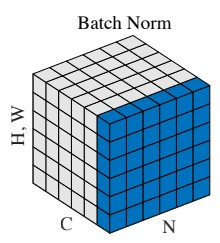

引用 : https://arxiv.org/abs/1803.08494


In [8]:
# 1つ目のチャンネルに対して、正規化後の平均を確認
print(batch_normalized_tensor[:, 0, :, :])
print("{:.5f}".format(np.mean(batch_normalized_tensor[:, 0, :, :])))

tf.Tensor(
[[[-1.6235 -0.6956 -0.5805 -1.7239  0.0823]
  [-0.5268 -0.9703 -1.7234 -0.6500  0.5656]
  [-0.7280 -0.0988 -0.0638  2.2212  0.4755]
  [ 0.7618 -0.6319 -1.1869  1.0393  0.4405]
  [ 1.2382  0.4947 -0.5911  1.1683  1.5206]]

 [[-0.7926 -0.3495 -0.4681  0.6756 -0.9733]
  [-0.4039  0.3216 -0.5805  1.0778 -1.5144]
  [-0.3971  0.4076  0.0107  0.5069 -0.3986]
  [-1.0438  1.0786 -1.0523 -0.3613  0.5506]
  [ 2.5845  0.9937  1.6262  1.1793 -0.8910]]], shape=(2, 5, 5), dtype=float32)
-0.00000


In [9]:
# 正解判定
answer_tensor = tf.constant(
       [[[[-1.6235, -0.6956, -0.5805, -1.7239,  0.0823],
          [-0.5268, -0.9703, -1.7234, -0.6500,  0.5656],
          [-0.7280, -0.0988, -0.0638,  2.2212,  0.4755],
          [ 0.7618, -0.6319, -1.1869,  1.0393,  0.4405],
          [ 1.2382,  0.4947, -0.5911,  1.1683,  1.5206]],

         [[-0.1647, -2.1106, -1.3593,  0.0582, -0.5801],
          [-0.7497, -0.1231,  1.7675, -0.0672,  0.1490],
          [-0.7266,  0.1878,  0.0436,  0.1445, -0.4466],
          [-0.1037,  0.2758, -0.1477, -0.0264,  2.2167],
          [-0.9746,  1.4812, -0.5915, -0.8713,  0.5131]],

         [[ 0.0957, -0.3848,  0.7606,  0.4540,  1.1449],
          [ 1.9568,  0.1636,  0.9286, -0.1452, -0.5830],
          [ 1.5021, -0.7979, -3.1483, -0.6817,  0.0081],
          [-0.9446, -0.5368, -0.9276, -0.1687,  0.0253],
          [ 1.6302,  0.0423, -0.6398, -0.1445, -0.9188]]],


        [[[-0.7926, -0.3495, -0.4681,  0.6756, -0.9733],
          [-0.4039,  0.3216, -0.5805,  1.0778, -1.5144],
          [-0.3971,  0.4076,  0.0107,  0.5069, -0.3986],
          [-1.0438,  1.0786, -1.0523, -0.3613,  0.5506],
          [ 2.5845,  0.9937,  1.6262,  1.1793, -0.8910]],

         [[ 1.3028, -0.7645, -0.8715,  1.0461,  1.2559],
          [ 0.5688, -0.0966, -0.1415, -1.9757, -0.5823],
          [-1.3891, -1.0649,  0.8221, -0.5261,  1.2095],
          [ 0.7686,  0.1936,  0.2875,  0.5043, -0.4048],
          [ 2.4057, -0.2188, -0.0121,  1.7499, -1.8613]],

         [[ 1.7498,  0.1296,  0.3571,  0.7126, -1.6638],
          [ 0.3703,  1.1778, -0.2569, -1.6498,  0.5589],
          [-1.4451,  0.7557, -0.3560, -0.0895,  0.3002],
          [ 0.0682, -0.5766, -0.6421,  2.4740,  0.7681],
          [-0.9930, -0.1600, -0.5026,  0.6833, -0.4612]]]],
          dtype=tf.float32
)

if tf.experimental.numpy.allclose(batch_normalized_tensor, answer_tensor, atol=1e-04):
  print("バッチ正規化が正しく実装できています。")
else:
  print("バッチ正規化の実装が間違っています。もう一度解きなおしてください。")

バッチ正規化が正しく実装できています。


### レイヤー正規化（layer normalization）

* <font color="Red">問2. 入力テンソル`input_tensor`をレイヤー正規化する式を記述してください。</font>

In [17]:
# レイヤー正規化層のインスタンス化
layer_norm = tf.keras.layers.LayerNormalization(axis=[1, 2, 3], epsilon=1e-05)

In [23]:
# レイヤー正規化の実行
layer_normalized_tensor = layer_norm(input_tensor, training=True)### 問2 ###
layer_normalized_tensor

<tf.Tensor: shape=(2, 3, 5, 5), dtype=float32, numpy=
array([[[[-1.4260, -0.6295, -0.5307, -1.5122,  0.0382],
         [-0.4847, -0.8653, -1.5117, -0.5904,  0.4530],
         [-0.6573, -0.1173, -0.0873,  1.8740,  0.3757],
         [ 0.6214, -0.5749, -1.0513,  0.8596,  0.3456],
         [ 1.0303,  0.3921, -0.5398,  0.9703,  1.2727]],

        [[-0.0396, -2.1655, -1.3447,  0.2039, -0.4934],
         [-0.6787,  0.0059,  2.0714,  0.0670,  0.3032],
         [-0.6534,  0.3456,  0.1880,  0.2982, -0.3476],
         [ 0.0271,  0.4417, -0.0210,  0.1115,  2.5622],
         [-0.9244,  1.7587, -0.5058, -0.8115,  0.7010]],

        [[ 0.2092, -0.3078,  0.9244,  0.5946,  1.3378],
         [ 2.2112,  0.2822,  1.1052, -0.0500, -0.5210],
         [ 1.7221, -0.7522, -3.2806, -0.6271,  0.1149],
         [-0.9100, -0.4713, -0.8917, -0.0752,  0.1334],
         [ 1.8599,  0.1517, -0.5821, -0.0493, -0.8822]]],


       [[[-0.8312, -0.4617, -0.5606,  0.3932, -0.9819],
         [-0.5071,  0.0980, -0.6543,  0.72

レイヤー正規化は、各サンプルごとに正規化する。

以下で、1つ目のサンプルを取り出した場合に、正規化（すなわち、平均がほぼ 0）できているかを確認する。

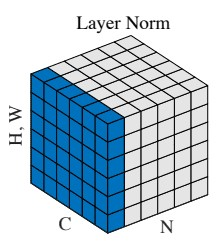

引用 : https://arxiv.org/abs/1803.08494

In [20]:
# 1つ目のサンプルに対して、正規化後の平均を確認
print("{:.5f}".format(np.mean(layer_normalized_tensor[0, :, :, :])))

-0.00000


In [21]:
# 正解判定
answer_tensor = tf.constant(
       [[[[-1.4260, -0.6295, -0.5307, -1.5122,  0.0382],
          [-0.4847, -0.8653, -1.5117, -0.5904,  0.4530],
          [-0.6573, -0.1173, -0.0873,  1.8740,  0.3757],
          [ 0.6214, -0.5749, -1.0513,  0.8596,  0.3456],
          [ 1.0303,  0.3921, -0.5398,  0.9703,  1.2727]],

         [[-0.0396, -2.1655, -1.3447,  0.2039, -0.4934],
          [-0.6787,  0.0059,  2.0714,  0.0670,  0.3032],
          [-0.6534,  0.3456,  0.1880,  0.2982, -0.3476],
          [ 0.0271,  0.4417, -0.0210,  0.1115,  2.5622],
          [-0.9244,  1.7587, -0.5058, -0.8115,  0.7010]],

         [[ 0.2092, -0.3078,  0.9244,  0.5946,  1.3378],
          [ 2.2112,  0.2822,  1.1052, -0.0500, -0.5210],
          [ 1.7221, -0.7522, -3.2806, -0.6271,  0.1149],
          [-0.9100, -0.4713, -0.8917, -0.0752,  0.1334],
          [ 1.8599,  0.1517, -0.5821, -0.0493, -0.8822]]],


        [[[-0.8312, -0.4617, -0.5606,  0.3932, -0.9819],
          [-0.5071,  0.0980, -0.6543,  0.7286, -1.4331],
          [-0.5014,  0.1696, -0.1613,  0.2525, -0.5026],
          [-1.0407,  0.7292, -1.0477, -0.4715,  0.2889],
          [ 1.9850,  0.6584,  1.1859,  0.8132, -0.9132]],

         [[ 1.3806, -0.8137, -0.9273,  1.1081,  1.3309],
          [ 0.6015, -0.1048, -0.1525, -2.0994, -0.6203],
          [-1.4768, -1.1327,  0.8704, -0.5608,  1.2816],
          [ 0.8135,  0.2033,  0.3029,  0.5330, -0.4319],
          [ 2.5512, -0.2345, -0.0151,  1.8552, -1.9779]],

         [[ 1.7933,  0.1000,  0.3377,  0.7093, -1.7745],
          [ 0.3516,  1.1955, -0.3040, -1.7598,  0.5487],
          [-1.5458,  0.7543, -0.4076, -0.1290,  0.2782],
          [ 0.0358, -0.6381, -0.7066,  2.5502,  0.7673],
          [-1.0733, -0.2027, -0.5608,  0.6787, -0.5175]]]],
          dtype=tf.float32
)

if tf.experimental.numpy.allclose(layer_normalized_tensor, answer_tensor, atol=1e-04):
  print("レイヤー正規化が正しく実装できています。")
else:
  print("レイヤー正規化の実装が間違っています。もう一度解きなおしてください。")

レイヤー正規化が正しく実装できています。


### インスタンス正規化（instance normalization）

* <font color="Red">問3. 入力テンソル`input_tensor`をインスタンス正規化する式を記述してください。</font>

In [22]:
# インスタンス正規化のインスタンス化
instance_norm = tf.keras.layers.BatchNormalization(axis=[0, 1], epsilon=1e-05, momentum=0.1)

In [24]:
# インスタンス正規化の実行
instance_normalized_tensor = instance_norm(input_tensor, training=True)### 問3 ###
instance_normalized_tensor

<tf.Tensor: shape=(2, 3, 5, 5), dtype=float32, numpy=
array([[[[-1.5100, -0.6072, -0.4952, -1.6077,  0.1496],
         [-0.4430, -0.8745, -1.6073, -0.5629,  0.6199],
         [-0.6388, -0.0266,  0.0074,  2.2306,  0.5322],
         [ 0.8107, -0.5453, -1.0853,  1.0807,  0.4981],
         [ 1.2742,  0.5508, -0.5056,  1.2062,  1.5490]],

        [[-0.0844, -2.2318, -1.4027,  0.1616, -0.5428],
         [-0.7300, -0.0385,  2.0479,  0.0233,  0.2618],
         [-0.7045,  0.3046,  0.1455,  0.2568, -0.3955],
         [-0.0171,  0.4018, -0.0657,  0.0682,  2.5437],
         [-0.9782,  1.7320, -0.5554, -0.8641,  0.6636]],

        [[ 0.1438, -0.3227,  0.7891,  0.4915,  1.1621],
         [ 1.9501,  0.2097,  0.9522, -0.0901, -0.5151],
         [ 1.5088, -0.7236, -3.0049, -0.6108,  0.0587],
         [-0.8660, -0.4702, -0.8495, -0.1129,  0.0754],
         [ 1.6332,  0.0919, -0.5701, -0.0894, -0.8409]]],


       [[[-0.8944, -0.4357, -0.5585,  0.6253, -1.0814],
         [-0.4921,  0.2589, -0.6748,  1.04

インスタンス正規化は、各チャンネルごとに正規化する。

以下で、1つ目のサンプルの1つ目のチャンネルを取り出した場合に、正規化（すなわち、平均がほぼ 0）できているかを確認する。

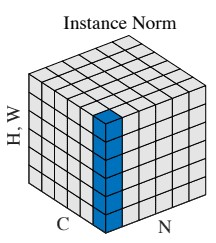

引用 : https://arxiv.org/abs/1803.08494


In [25]:
# 1つ目のサンプルに対して、正規化後の平均を確認
print("{:.5f}".format(np.mean(instance_normalized_tensor[0, 0, :, :])))

0.00000


In [26]:
# 正解判定
answer_tensor = tf.constant(
       [[[[-1.5100, -0.6072, -0.4952, -1.6077,  0.1496],
          [-0.4430, -0.8745, -1.6073, -0.5629,  0.6199],
          [-0.6388, -0.0266,  0.0074,  2.2306,  0.5322],
          [ 0.8107, -0.5453, -1.0853,  1.0807,  0.4981],
          [ 1.2742,  0.5508, -0.5056,  1.2062,  1.5490]],

         [[-0.0844, -2.2318, -1.4027,  0.1616, -0.5428],
          [-0.7300, -0.0385,  2.0479,  0.0233,  0.2618],
          [-0.7045,  0.3046,  0.1455,  0.2568, -0.3955],
          [-0.0171,  0.4018, -0.0657,  0.0682,  2.5437],
          [-0.9782,  1.7320, -0.5554, -0.8641,  0.6636]],

         [[ 0.1438, -0.3227,  0.7891,  0.4915,  1.1621],
          [ 1.9501,  0.2097,  0.9522, -0.0901, -0.5151],
          [ 1.5088, -0.7236, -3.0049, -0.6108,  0.0587],
          [-0.8660, -0.4702, -0.8495, -0.1129,  0.0754],
          [ 1.6332,  0.0919, -0.5701, -0.0894, -0.8409]]],


        [[[-0.8944, -0.4357, -0.5585,  0.6253, -1.0814],
          [-0.4921,  0.2589, -0.6748,  1.0417, -1.6415],
          [-0.4850,  0.3479, -0.0629,  0.4507, -0.4865],
          [-1.1544,  1.0424, -1.1632, -0.4480,  0.4959],
          [ 2.6012,  0.9546,  1.6092,  1.1467, -0.9962]],

         [[ 1.1261, -0.7906, -0.8898,  0.8881,  1.0826],
          [ 0.4455, -0.1713, -0.2130, -1.9135, -0.6216],
          [-1.3697, -1.0692,  0.6804, -0.5696,  1.0396],
          [ 0.6308,  0.0977,  0.1847,  0.3857, -0.4571],
          [ 2.1486, -0.2847, -0.0930,  1.5406, -1.8075]],

         [[ 1.7572,  0.0800,  0.3154,  0.6835, -1.7767],
          [ 0.3292,  1.1651, -0.3202, -1.7622,  0.5244],
          [-1.5502,  0.7281, -0.4228, -0.1469,  0.2565],
          [ 0.0164, -0.6511, -0.7189,  2.5070,  0.7410],
          [-1.0822, -0.2198, -0.5745,  0.6532, -0.5317]]]],
          dtype=tf.float32
)

if tf.experimental.numpy.allclose(instance_normalized_tensor, answer_tensor, atol=1e-04):
  print("インスタンス正規化が正しく実装できています。")
else:
  print("インスタンス正規化の実装が間違っています。もう一度解きなおしてください。")

インスタンス正規化が正しく実装できています。


## 2. im2col, col2im

画像データに対する畳み込みなどの演算を行列積として実装するため、  
四次元配列である画像を二次元配列へと変換する関数 `im2col`、  
逆伝播用の逆変換 `col2im` を実装します。

画像データにフィルタをそのまま適用してしまうと計算に時間がかかることが知られています。

(numpyは行列計算が高速にできるようになっており、逆にfor文には時間がかかるため)

そこで、今回はこの処理を行列演算で行っていきます。  
im2colの手順としては

- 高次元配列を二次元配列に変換する。(①フィルタの行列変換、②画像データの行列変換)
- 行列積を求める。
- 行列を高次元配列に変換する。

となります。

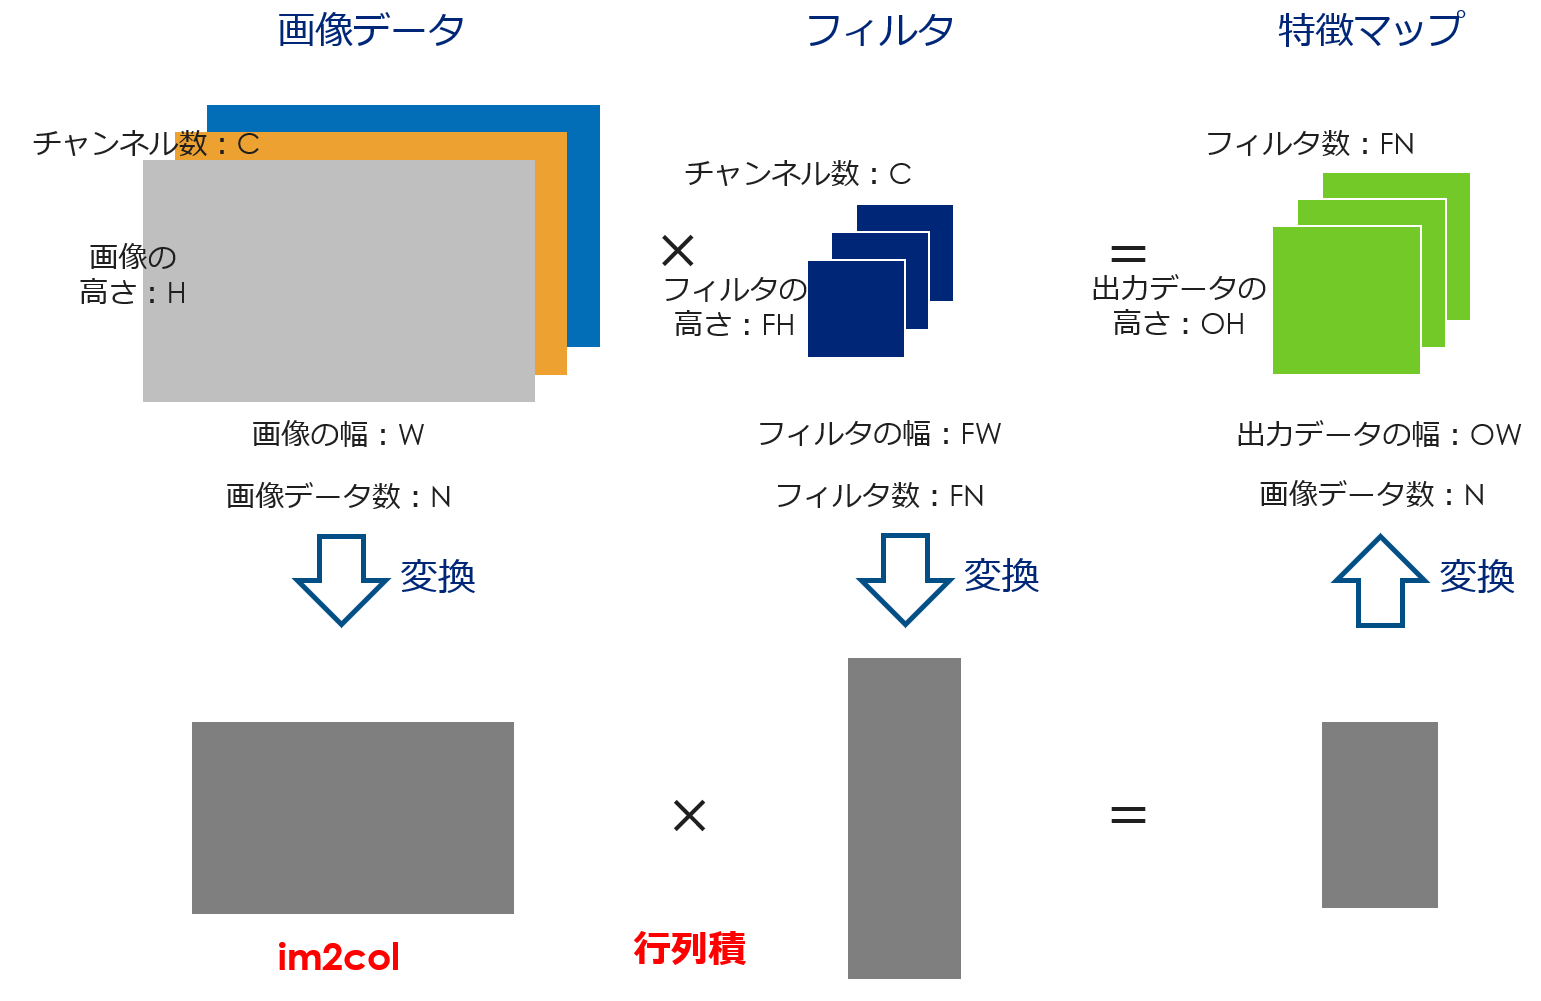

### ①フィルタの行列変換

画像データだけではなく、フィルタのデータも多次元です。  
im2colを考える前に、このフィルタをどのように行列化するかを考えていきます。

まずは配列の表記にして考えてみましょう。  
ここでは元々のフィルタをfilter_org(FN, C, FH, FW)と記載することとします。

フィルタの数がFN個あり、これらを画像データ群に適用させる必要があります。

画像データの配列と行列積を行うためには、縦方向に「一つのフィルタの情報」を格納し、そのフィルタ情報を横に並べる形をとります。

行列の縦方向は「フィルタのデータ（C×FH×FW）」が入ります。  
フィルタの行列としてはfilter_col(C×FH×FW, FN)となります。

また、よくある間違い例として  
<font color="Red">filter_org(FN, C, FH, FW)から変換せずに、いきなりreshapeを行ってしまう</font>  
という例があります。

numpy.reshapeは先頭からデータを取ってくるので、  
filter_org(FN, C, FH, FW)はFN→C→FH→FWの順番でデータを取ってきます。

しかし、filter_col(C×FH×FW, FN)の順番はC→FH→FW→FNとなっているため、これでは上手くいきません。

あらかじめfilter_org(FN, C, FH, FW)をfilter_org(C, FH, FW, FN)に変換する必要があります。

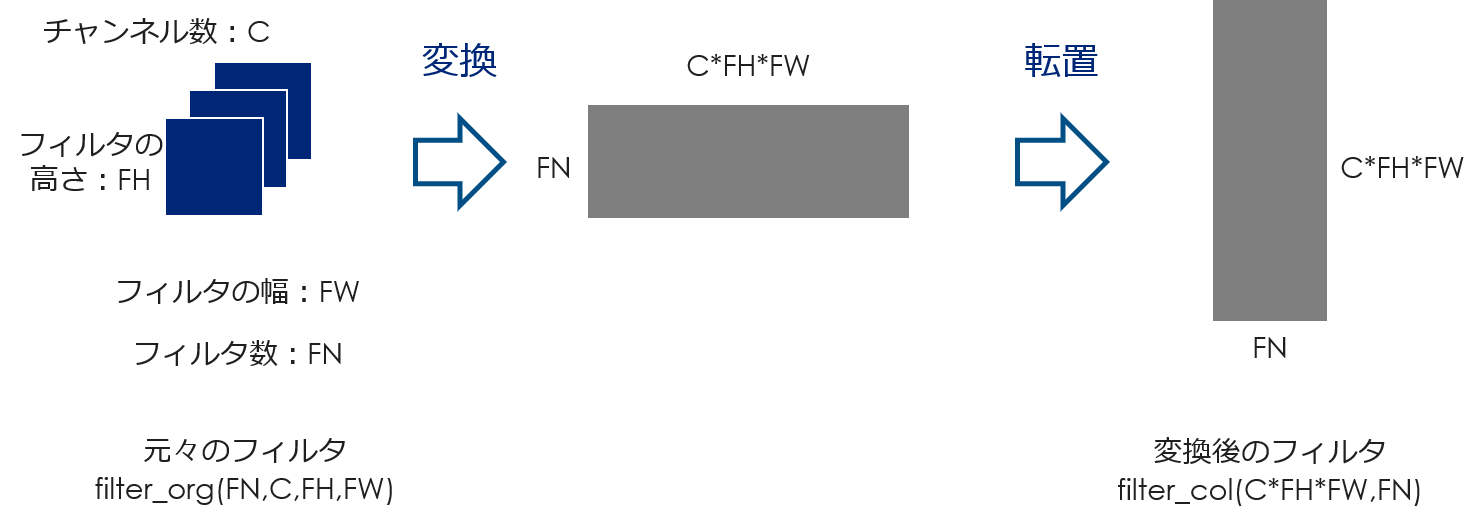

### ②画像データの行列変換

続いてどのようなサイズの行列にすべきかを考えます。  
フィルタのサイズはfilter_col(C×FH×FW, FN)です。

行列変換後の画像ファイルをim_colとすると、im_colとfilter_colとの行列積を求めるためには、im_colの列のサイズはfilter_colの行のサイズと同じにする必要があります。  
つまり、C×FH×FWです。

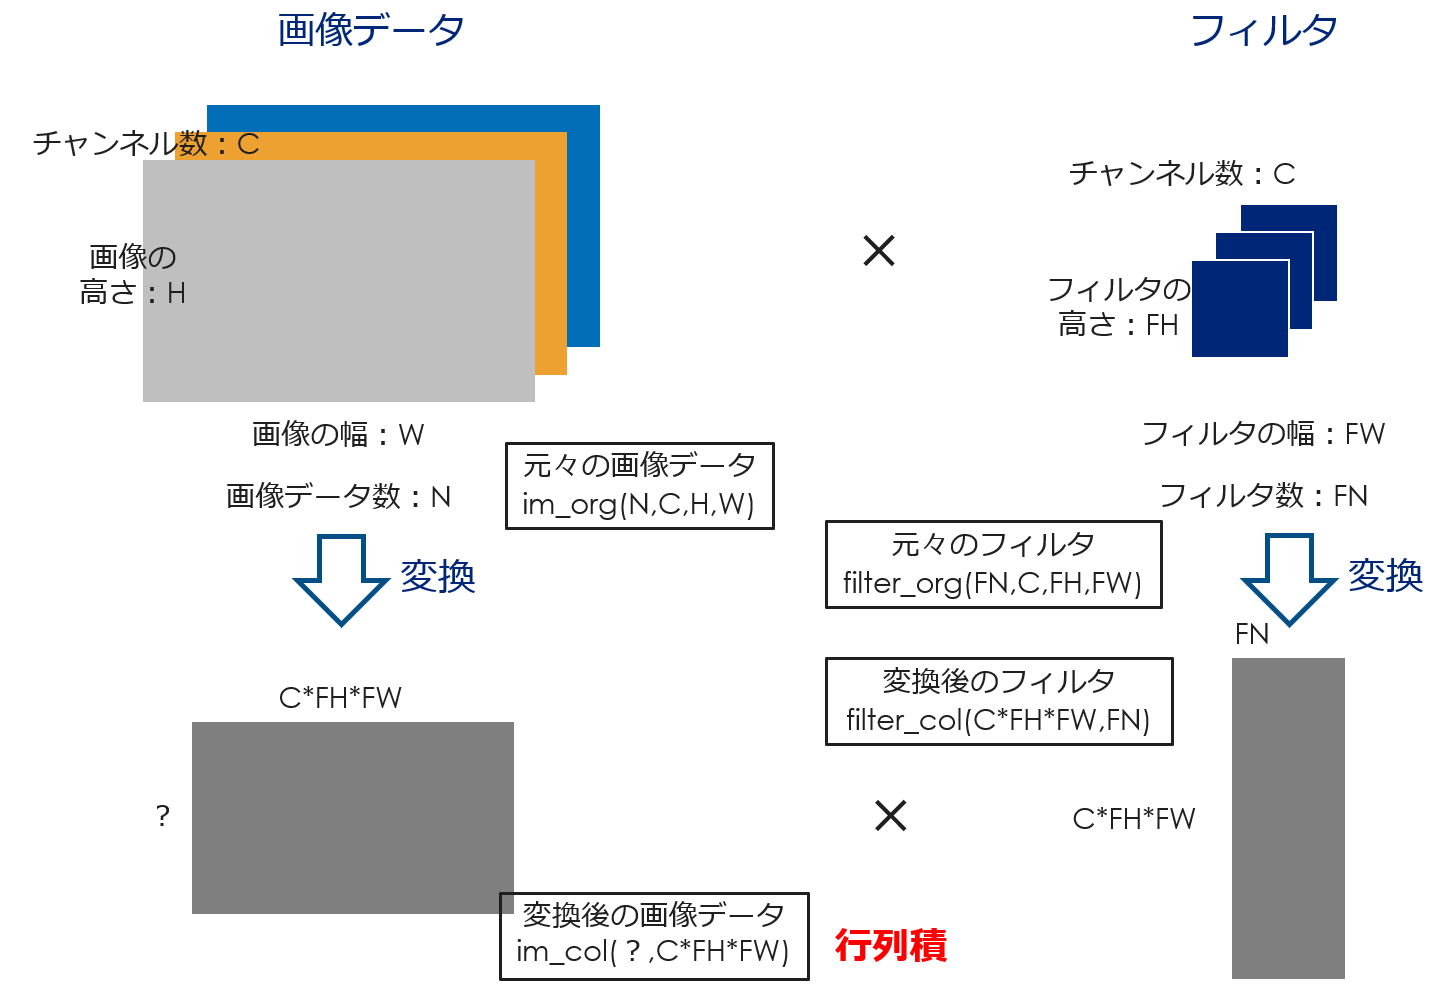

次に、im_colの縦方向にはどのような値を入れるのかを考えます。  

filter_colの行列積を取ることを考えると、  
1列目にはフィルタ "0" が掛け合わされます。

2列目にはフィルタ"1”、3列目は、・・・・というふうにつながります。

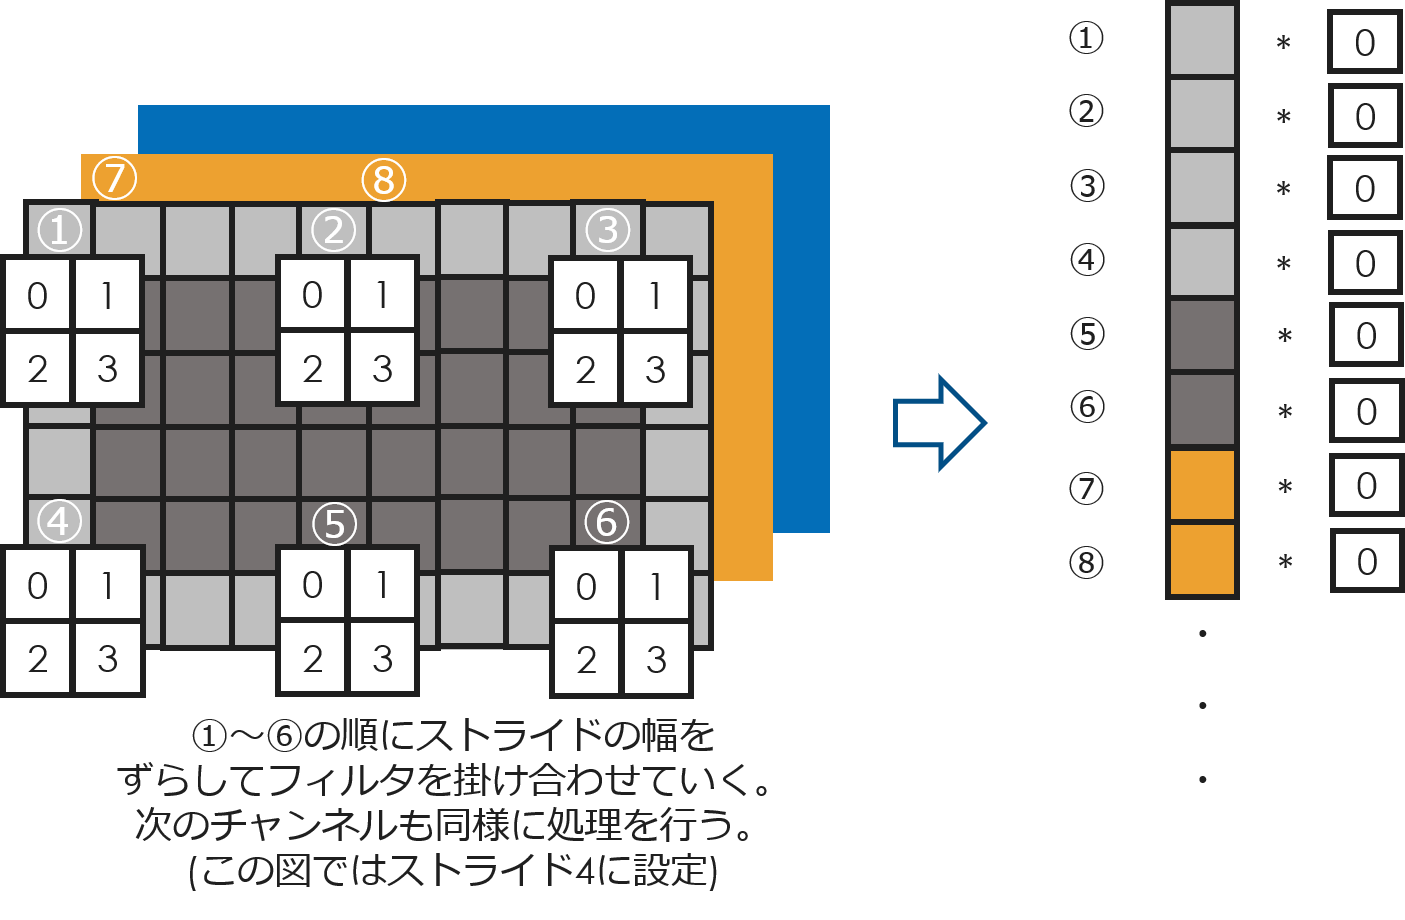

ここでOHは出力データの高さ、OWは出力データの幅だったので、値の個数は（N×OH×OW）となります。<br>

Nは画像データの数です。OH,OWですが、これは畳み込み後のデータサイズを表します。<br>

結論として、画像データの変換後サイズは　im_col(N×OH×OW, C×FH×FW) となります。<br>

im2colの説明は以上です。それでは実際にim2colを実装していきましょう。<br>

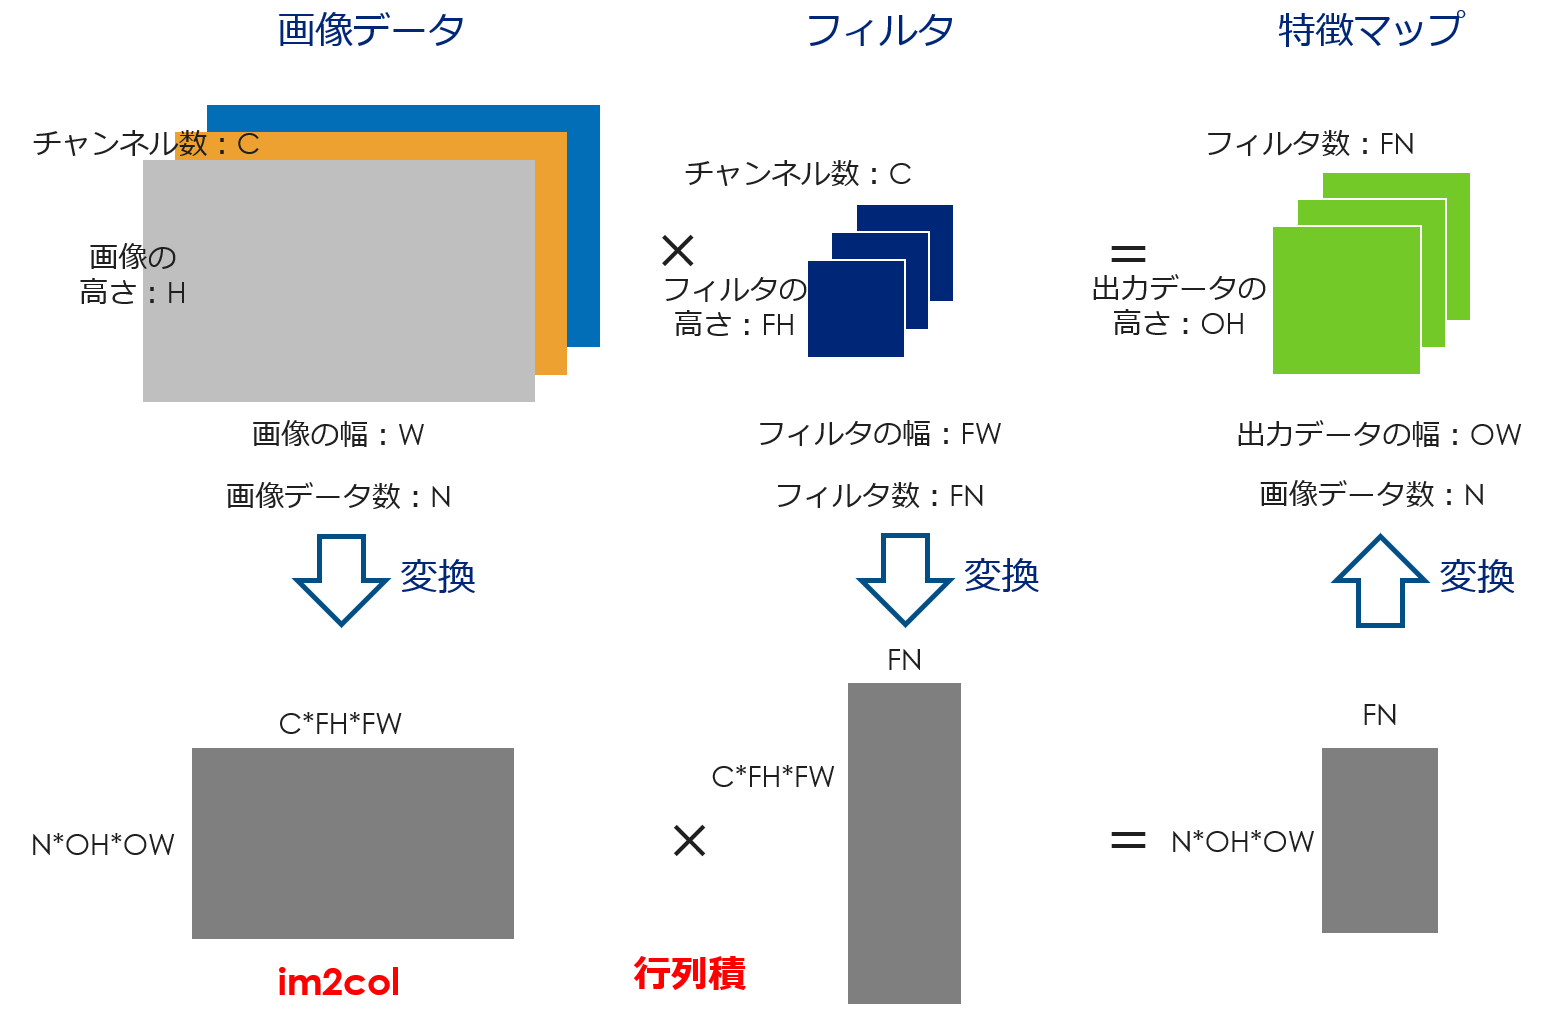

* <font color="Red">問4. 画像データを二次元配列へと変換する関数 `im2col` を完成させてください。</font>
```
引数:
    input_data: 入力画像データ。形状は [N, C, H, W] でそれぞれバッチサイズ、チャンネル数、高さ、幅
    filter_h: フィルタの高さ
    filter_w: フィルタの幅
    stride: ストライド数
    pad: パディング数
返値:
    col: 行列変換後のデータ。形状は [N*out_h*out_w, C*filter_h*filter_w] で、out_hとout_wはそれぞれフィルタ適応後の出力画像サイズ
```
  * <font color="Red">問4-1. `H`, `filter_h`, `pad`, `stride`の変数を用いて、フィルタ適応後の出力画像の高さを算出する式を記述してください。</font>
  * <font color="Red">問4-2. `W`, `filter_w`, `pad`, `stride`の変数を用いて、フィルタ適応後の出力画像の幅を算出する式を記述してください。</font>
  * <font color="Red">問4-3. `input_data`に対して、パディング処理をする式を記述してください。</font>
  * <font color="Red">問4-4. 画像データを行列に変換する処理を記述しましょう。</font>

In [28]:
#作業コード
import numpy as np

sample = np.array([[1, 2], [3, 4]])
print(sample)

[[1 2]
 [3 4]]


In [55]:
np.pad(sample,[(0,0),(1,1)],'constant')

array([[0, 1, 2, 0],
       [0, 3, 4, 0]])

In [58]:
np.pad(sample,[(2,2),(1,1)],'constant')

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 2, 0],
       [0, 3, 4, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [140]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    
    # フィルタを適用した際、出力の画像サイズがどうなるかを計算
    out_h = (H + 2*pad - filter_h)// stride + 1#### 問4-1 ####
    out_w = (W + 2*pad - filter_w)// stride + 1#### 問4-2 ####

    # パディング処理
    img = np.pad(input_data, [(0, 0),(0, 0),(pad, pad), (pad, pad)], 'constant')#### 問4-3 ####
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h

        for x in range(filter_w):
            x_max = x + stride * out_w
            # 画像データを行列に変換する処理
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]#### 問4-4 ####

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

### 確認用セル
以下のセルを実行して`im2col`の実装が正しいか確認してください。

In [141]:
dummy_imgs = np.arange(135).reshape(5,3,3,3)
dummy_kernels = np.arange(48).reshape(4,3,2,2)
dummy_conv = np.dot(im2col(dummy_imgs, 2,2, pad=1), dummy_kernels.reshape(4,12).T)

In [142]:
ans = np.array([[  261.,   585.,   909.,  1233.],
       [  516.,  1200.,  1884.,  2568.],
       [  555.,  1311.,  2067.,  2823.],
       [  270.,   666.,  1062.,  1458.],
       [  531.,  1287.,  2043.,  2799.],
       [ 1035.,  2619.,  4203.,  5787.],
       [ 1101.,  2829.,  4557.,  6285.],
       [  528.,  1428.,  2328.,  3228.],
       [  639.,  1611.,  2583.,  3555.],
       [ 1233.,  3249.,  5265.,  7281.],
       [ 1299.,  3459.,  5619.,  7779.],
       [  618.,  1734.,  2850.,  3966.],
       [  297.,   837.,  1377.,  1917.],
       [  564.,  1680.,  2796.,  3912.],
       [  591.,  1779.,  2967.,  4155.],
       [  276.,   888.,  1500.,  2112.],
       [  828.,  2124.,  3420.,  4716.],
       [ 1569.,  4197.,  6825.,  9453.],
       [ 1608.,  4308.,  7008.,  9708.],
       [  756.,  2124.,  3492.,  4860.],
       [ 1503.,  4203.,  6903.,  9603.],
       [ 2817.,  8289., 13761., 19233.],
       [ 2883.,  8499., 14115., 19731.],
       [ 1338.,  4182.,  7026.,  9870.],
       [ 1611.,  4527.,  7443., 10359.],
       [ 3015.,  8919., 14823., 20727.],
       [ 3081.,  9129., 15177., 21225.],
       [ 1428.,  4488.,  7548., 10608.],
       [  702.,  2214.,  3726.,  5238.],
       [ 1293.,  4353.,  7413., 10473.],
       [ 1320.,  4452.,  7584., 10716.],
       [  600.,  2184.,  3768.,  5352.],
       [ 1395.,  3663.,  5931.,  8199.],
       [ 2622.,  7194., 11766., 16338.],
       [ 2661.,  7305., 11949., 16593.],
       [ 1242.,  3582.,  5922.,  8262.],
       [ 2475.,  7119., 11763., 16407.],
       [ 4599., 13959., 23319., 32679.],
       [ 4665., 14169., 23673., 33177.],
       [ 2148.,  6936., 11724., 16512.],
       [ 2583.,  7443., 12303., 17163.],
       [ 4797., 14589., 24381., 34173.],
       [ 4863., 14799., 24735., 34671.],
       [ 2238.,  7242., 12246., 17250.],
       [ 1107.,  3591.,  6075.,  8559.],
       [ 2022.,  7026., 12030., 17034.],
       [ 2049.,  7125., 12201., 17277.],
       [  924.,  3480.,  6036.,  8592.],
       [ 1962.,  5202.,  8442., 11682.],
       [ 3675., 10191., 16707., 23223.],
       [ 3714., 10302., 16890., 23478.],
       [ 1728.,  5040.,  8352., 11664.],
       [ 3447., 10035., 16623., 23211.],
       [ 6381., 19629., 32877., 46125.],
       [ 6447., 19839., 33231., 46623.],
       [ 2958.,  9690., 16422., 23154.],
       [ 3555., 10359., 17163., 23967.],
       [ 6579., 20259., 33939., 47619.],
       [ 6645., 20469., 34293., 48117.],
       [ 3048.,  9996., 16944., 23892.],
       [ 1512.,  4968.,  8424., 11880.],
       [ 2751.,  9699., 16647., 23595.],
       [ 2778.,  9798., 16818., 23838.],
       [ 1248.,  4776.,  8304., 11832.],
       [ 2529.,  6741., 10953., 15165.],
       [ 4728., 13188., 21648., 30108.],
       [ 4767., 13299., 21831., 30363.],
       [ 2214.,  6498., 10782., 15066.],
       [ 4419., 12951., 21483., 30015.],
       [ 8163., 25299., 42435., 59571.],
       [ 8229., 25509., 42789., 60069.],
       [ 3768., 12444., 21120., 29796.],
       [ 4527., 13275., 22023., 30771.],
       [ 8361., 25929., 43497., 61065.],
       [ 8427., 26139., 43851., 61563.],
       [ 3858., 12750., 21642., 30534.],
       [ 1917.,  6345., 10773., 15201.],
       [ 3480., 12372., 21264., 30156.],
       [ 3507., 12471., 21435., 30399.],
       [ 1572.,  6072., 10572., 15072.]])

if (dummy_conv == ans).all():
    print("im2col の実装に問題はありません。先に進んでください。")
else:
    print("im2col の実装に問題があります。解き直してください。")

im2col の実装に問題はありません。先に進んでください。


* <font color="Red">問5. 二次元配列での勾配を四次元配列の画像データでの勾配へと変換する関数 `col2im` を完成させてください。</font>

```
引数:
    col: 行列データ
    input_shape: 入力画像データの形状。 tuple(N, C, H, W) でそれぞれバッチサイズ、チャンネル数、高さ、幅
    filter_h: フィルタの高さ
    filter_w: フィルタの幅
    stride: ストライド数
    pad: パディング数
返値:
    img: 行列から変換した画像データ
```

  * <font color="Red">問5-1. `H`, `filter_h`, `pad`, `stride`の変数を用いて、フィルタ適応後の出力画像の高さを算出する式を記述してください。</font>
  * <font color="Red">問5-2. `W`, `filter_w`, `pad`, `stride`の変数を用いて、フィルタ適応後の出力画像の幅を算出する式を記述してください。</font>
  * <font color="Red">問5-3. 行列を画像データに変換する処理を記述しましょう。</font>

`col2im` の実装問題は、問4で実装したim2colの逆変換となります。

In [143]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):

    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1#### 問5-1 (問4-1 と同じ) ####
    out_w = (W + 2*pad - filter_w)//stride + 1#### 問5-2 (問4-2 と同じ) ####
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2 * pad + stride - 1, W + 2 * pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]#### 問5-3 ####

    return img[:, :, pad:H + pad, pad:W + pad]

## 3. CNNによるFashionMNISTの画像分類（スクラッチ）

本節では、先ほど実装した `im2col` と `col2im` を用いて 畳み込みクラス、poolingクラスを実装し、CNN による学習を行います。

### Convolution の実装

* <font color="Red">問6. 作成した `im2col` と `col2im` を使用し、畳み込み層 `Convolution` を完成させてください。</font>
  * <font color="Red">問6-1. 入力画像の高さ`H`, フィルタ高さ`FH`, パディング数`self.pad`, ストライド数`self.stride`の変数を用いて、フィルタ適応後の出力画像の高さを算出する式を記述してください。</font>
  * <font color="Red">問6-2. 入力画像の幅`W`, フィルタ幅`FW`, パディング数`self.pad`, ストライド数`self.stride`の変数を用いて、フィルタ適応後の出力画像の幅を算出する式を記述してください。</font>
  * <font color="Red">問6-3. 入力画像`x`を`im2col`を用いて行列化してください。</font>
  * <font color="Red">問6-4. `col`, `col_W`, `self.b`を用いて順伝播の出力を算出する式を記述してください。</font>
  * <font color="Red">問6-5. `dout`, `self.col_W`を用いて出力の勾配`dcol`を算出する式を記述してください。</font>
  * <font color="Red">問6-6. 出力の勾配`dcol`を`col2im`を用いて画像データにしてください。</font>

In [144]:
class Convolution:
    def __init__(self, input_channel, output_channel, kernel_h=5, kernel_w=5, stride=1, pad=0):
        self.W = 0.01 * np.random.randn(output_channel, input_channel, kernel_h, kernel_w)
        self.b = np.zeros(output_channel)
        self.stride = stride
        self.pad = pad
        self.kernel_h = kernel_h
        self.kernel_w = kernel_w
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape

        # フィルタ適用後の出力サイズの算出
        out_h = (H + 2*self.pad - self.kernel_h)//self.stride + 1#### 問6-1 ####
        out_w = (W + 2*self.pad - self.kernel_w)//self.stride + 1#### 問6-2 ####

        # x と self.W の行列化
        col = im2col(x, FH, FW, self.stride, self.pad)#### 問6-3 ####
        col_W = self.W.reshape(FN, -1).T

        # 順伝播
        out = np.dot(col, col_W) + self.b#### 問6-4 ####
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        # 出力の勾配を算出
        dcol = np.dot(dout, self.col_W.T)#### 問6-5 ####

        # 勾配の画像データ化
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)#### 問6-6 ####

        return dx

### Pooling の実装

* <font color="Red">問7. 作成した`im2col`, `col2im` を使用し、プーリング層 `Pooling` を完成させてください。</font>
  * <font color="Red">問7-1. 入力画像の高さ`H`, フィルタ高さ`self.pool_h`, ストライド数`self.stride`の変数を用いて、フィルタ適応後の出力画像の高さを算出する式を記述してください。</font>
  * <font color="Red">問7-2. 入力画像の幅`W`, フィルタ幅`self.pool_w`, ストライド数`self.stride`の変数を用いて、フィルタ適応後の出力画像の幅を算出する式を記述してください。</font>
  * <font color="Red">問7-3. ウィンドウ内の最大値を取得する処理を記述してください。</font>

In [154]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape

        # フィルタ適用後の出力サイズの算出
        out_h = int(1 + (H - self.pool_h) / self.stride)#### 問7-1 ####
        out_w = int(1 + (W - self.pool_w) / self.stride)#### 問7-2 ####
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        # ウィンドウ内の最大値を取得
        out = np.max(col, axis=1)#### 問7-3 ####
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

### Batch Normalization の実装

バッチ正規化の実装になります。  
問題にはなっていませんが、復習も兼ねて読み返してください。

In [155]:
class BatchNormalization:
    def __init__(self, input_channel, momentum=0.9):
        self.momentum = momentum

        # パラメータ
        self.gamma = np.ones(input_channel)
        self.beta = np.zeros(input_channel)

        # パラメータの勾配
        self.dgamma = None
        self.dbeta = None
        
        # テスト時に使用するために、移動平均で求める平均と分散
        self.moving_mean = np.zeros(input_channel)
        self.moving_var = np.zeros(input_channel)

        # 逆伝播に使用する変数
        self.xc = None
        self.xn = None
        self.std = None
        self.size = None

        # 学習かテストか
        self.train_flag = False
    
    def set_train_flag(self, train_flag):
        self.train_flag = train_flag

    def forward(self, x):
        N, C, H, W = x.shape
        x = x.transpose(0, 2, 3, 1). reshape(-1, C)


        if self.train_flag:
            mu = x.mean(axis=0)             # 今回のミニバッチの平均
            xc = x - mu                      # 今回のミニバッチの平均との差分
            var = np.mean(xc ** 2, axis=0)  # 今回のミニバッチの分散
            std = np.sqrt(var + 10e-7)       # 今回のミニバッチの標準偏差
            xn = xc / std                    # 正規化

            # 平均と分散の移動平均を更新
            self.moving_mean = self.momentum * self.moving_mean + (1 - self.momentum) * mu
            self.moving_var = self.momentum * self.moving_var + (1 - self.momentum) * var

            # 逆伝播で使用する変数の更新
            self.xc = xc
            self.xn = xn
            self.std = std
            self.size = x.shape[0]
        
        else:
            # テスト時の処理
            xc = x - self.moving_mean
            xn = xc / np.sqrt(self.moving_var + 10e-7)
        
        # 正規化されたテンソルに対して、スケール処理とシフト処理
        out = self.gamma * xn + self.beta

        return out.reshape(N, H, W, C).transpose(0, 3, 1, 2)

    def backward(self, dout):
        N, C, H, W = dout.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, C)

        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)

        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.size) * self.xc * dvar
        dmoving_mean = np.sum(dxc, axis=0)
        dx = dxc - (dmoving_mean / self.size)

        # インスタンス変数に保存
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx.reshape(N, H, W, C).transpose(0, 3, 1, 2)

### Affine 変換層とコスト関数

Affine 変換層とコスト関数の実装になります。  
問題にはなっていませんが、復習も兼ねて読み返してください。

#### Affine変換層（全結合層）について

- 順伝播 `forward(self, x)` は、入力信号 `x` を層の重み `self.W` とバイアス `self.b` でアフィン変換し出力とします。  
計算は以下の式に従います。
$$ Affin(x) = x \cdot w + b $$
ただし、画像を扱う場合に入力される `x` はベクトルではなく、テンソルであるため、
```python
x = x.reshape(x.shape[0], -1)
```
で、事前にテンソルをベクトルに変換します。

- 逆伝播 `backward(self, dout)` は出力側の勾配 `[L, M]` を入力側に逆伝播ます。入力の勾配 `dx`、重みの勾配 `dw`、バイアスの勾配 `db` をそれぞれ計算し、`dx` を返します。  
計算は以下の式に従います。
$$ grad(x_{ij}) = \sum_{k} grad(out_{ik}) \frac{dout_{ik}}{dx_{ij}} \\
    grad(x_{ij}) = \sum_{k} grad(out_{ik})w_{jk} \\
    grad(x) = grad(out) \cdot w^T \\ \space \\
    grad(w_{jk}) = \sum_{i} grad(out_{ik}) \frac{dout_{ik}}{dw_{jk}} \\
    grad(w_{jk}) = \sum_{i} grad(out_{ik})x_{ij} \\
    grad(w) = x^T \cdot grad(out) \\ \space \\
    grad(b_{k}) = \sum_{i} grad(out_{ik}) \frac{dout_{ik}}{db_{k}} \\
    grad(b) = \sum_{i} grad(out_{i}) $$  
    
    実装コードでは $grad(x)$ = `dx`, $grad(w)$ = `dw`, $grad(b)$ = `db`と命名されています。

In [156]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [157]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

class Affine:
    def __init__(self, input_size, output_size):
        self.W = 0.01 * np.random.randn(input_size, output_size)
        self.b = np.zeros(output_size)
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

### ネットワーク構築

これまでに実装した各層のクラスを用いて<font color="red">バッチ正規化付きの CNN</font> を構築します。

今回構築する CNN の構造は以下の通りです。

(input)  
-> Conv1 (入力チャンネル=1, 出力チャンネル=10, フィルタサイズ=5)  
-> BatchNorm1  
-> Relu1  
-> Pool1 (フィルタサイズ=2, ストライド=2)  
-> Conv2 (入力チャンネル=10, 出力チャンネル=10, フィルタサイズ=5)   
-> BatchNorm2  
-> Relu2  
-> Affine (入力サイズ=640, 出力サイズ=10)  
-> (output)

バッチサイズNと定義します。

入力されてくるデータのサイズは`(N, 1, 28, 28)`であり

1回目の畳み込み層`Conv1`により`(N, 10, 24, 24)`に変換

1回目のプーリング層`Pool1`により`(N, 10, 12, 12)`に変換

2回目の畳み込み層`Conv2`により`(N, 10, 8, 8)`に変換後、全結合層`Affine`により`(N, 10)`のサイズのデータを出力します。

その後Softmaxを使用して10種類のラベルについて確率値を出力し、クロスエントロピーで損失を計算します。


In [158]:
class BatchNormConvNet:
    def __init__(self, input_dim=(1, 28, 28), output_size=10, weight_init_std=0.01):
 
        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(1,10,5,5)
        self.layers['BatchNorm1'] = BatchNormalization(10)
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Conv2'] =Convolution(10,10,5,5)
        self.layers['BatchNorm2'] = BatchNormalization(10)
        self.layers['Relu2'] = Relu()
        self.layers['Affine'] = Affine(640, 10)

        self.last_layer = SoftmaxWithLoss()
        
        # 重みの初期化
        self.params = {}
        self.params['W1'] = self.layers['Conv1'].W
        self.params['b1'] = self.layers['Conv1'].b
        self.params['gamma1'] = self.layers['BatchNorm1'].gamma
        self.params['beta1'] = self.layers['BatchNorm1'].beta
        self.params['W2'] = self.layers['Conv2'].W
        self.params['b2'] = self.layers['Conv2'].b
        self.params['gamma2'] = self.layers['BatchNorm2'].gamma
        self.params['beta2'] = self.layers['BatchNorm2'].beta
        self.params['W3'] = self.layers['Affine'].W
        self.params['b3'] = self.layers['Affine'].b
    
    def set_train_flag(self, train_flag):
        self.layers['BatchNorm1'].set_train_flag(train_flag)
        self.layers['BatchNorm2'].set_train_flag(train_flag)


    def forward(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.forward(x)
        return self.last_layer.forward(y, t)

    def backward(self, x, t):
        """勾配を求める（誤差逆伝搬法）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['gamma1'], grads['beta1'] = self.layers['BatchNorm1'].dgamma, self.layers['BatchNorm1'].dbeta
        grads['W2'], grads['b2'] = self.layers['Conv2'].dW, self.layers['Conv2'].db
        grads['gamma2'], grads['beta2'] = self.layers['BatchNorm2'].dgamma, self.layers['BatchNorm2'].dbeta
        grads['W3'], grads['b3'] = self.layers['Affine'].dW, self.layers['Affine'].db

        return grads

#### 学習データの準備

今回はデータセットとして、"FashionMNIST"を用います。

"FashionMNIST"は「10種類の衣類の画像」を含むデータセットで、チュートリアルでよく使われています。データセット全体は70000件で構成されています。

`sklearn`の`train_test_split`を用いてFashionMNISTデータを訓練データ:テストデータ=8:2に分割します。

データは 1チャンネル 28×28 の配列となっています。

In [159]:
dataset_filename = "Fashion-MNIST"
if os.path.exists(dataset_filename):
    # データファイルが見つかった場合、読み込み
    with open(dataset_filename, 'rb') as f:
        mnist = pickle.load(f)
else:
    # データファイルが見つからない場合、
    # データをダウンロード
    mnist = datasets.fetch_openml(dataset_filename, as_frame=False)
    with open(dataset_filename, 'wb') as f:
        pickle.dump(mnist, f)

# 画像とラベルを取得
X, T = mnist.data, mnist.target

# 訓練データとテストデータに分割
x_train, x_test, t_train, t_test = train_test_split(X, T, test_size=0.2)

# データの整形
x_train = x_train.reshape(-1,1,28,28)
x_train /= x_train.max()
x_test = x_test.reshape(-1,1,28,28)
x_test /= x_test.max()

# ラベルデータをint型にし、one-hot-vectorに変換します
t_train = np.eye(10)[t_train.astype("int")]
t_test = np.eye(10)[t_test.astype("int")]

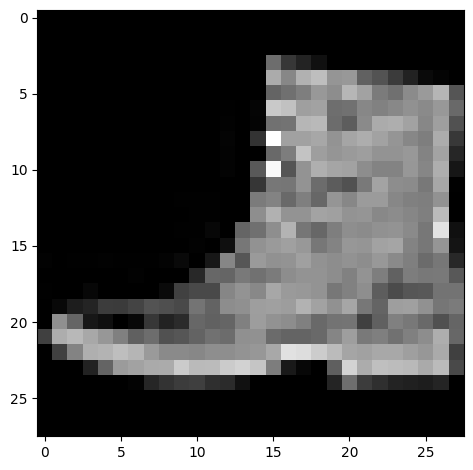

label:  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000]


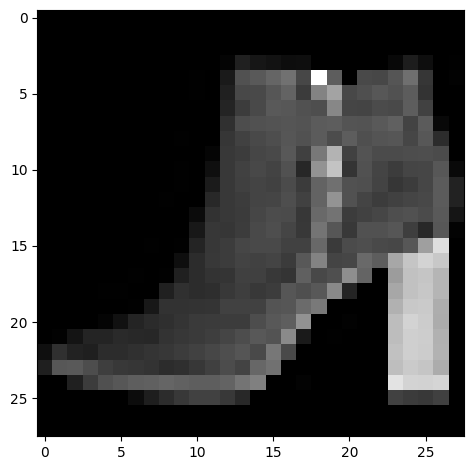

label:  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000]


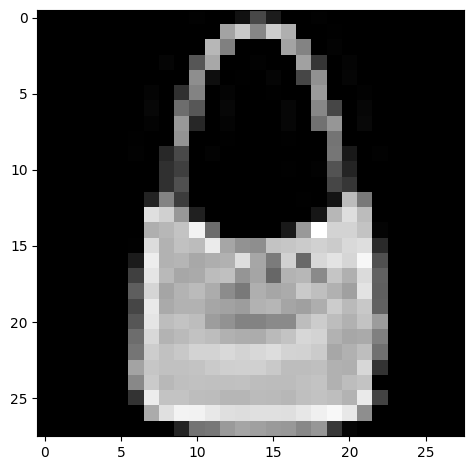

label:  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000]


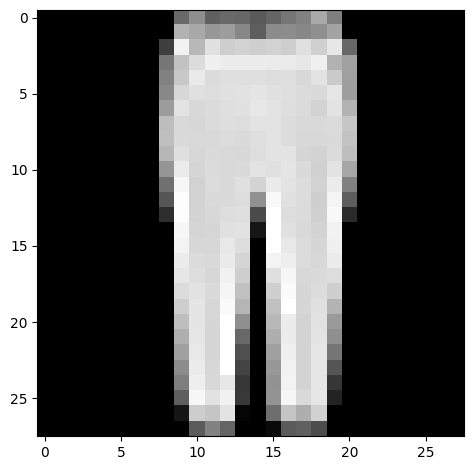

label:  [0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]


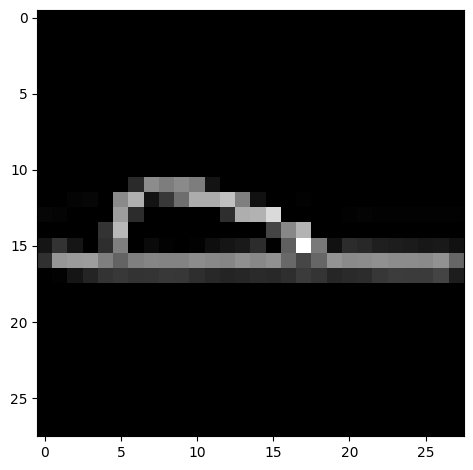

label:  [0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000]


In [160]:
# データを5つ表示
for i in range(5):
    plt.gray()
    plt.imshow(x_train[i][0])
    plt.tight_layout()
    plt.show()
    print("label: ", t_train[i])

## 学習

５エポックで精度が 80% 以上になっていれば学習成功です。

Convolution や Pooling はGPUでは高速ですが、CPUで実行した場合は非常に実行時間がかかるため、学習セルの実行には時間を要します。10~15分ほど要しますので、ご注意ください。

<font color="red"></font>

In [161]:
# ネットワークのインスタンス化
network = BatchNormConvNet(input_dim=(1,28,28),  output_size=10, weight_init_std=0.01)

In [162]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 

In [163]:
acc_list = []
sgd = SGD(lr = 0.01)
batch_size = 256

In [164]:
for epoch in range(5):
    perm = np.random.permutation(len(x_train))

    network.set_train_flag(True)
    for idx in np.arange(0, len(perm), batch_size):
        x = x_train[perm[idx:idx+batch_size]]
        t =  t_train[perm[idx:idx+batch_size]]

        grads = network.backward(x, t)
        sgd.update(network.params,grads)
    
    network.set_train_flag(False)
    y_test = network.forward(x_test)
    acc_list.append((y_test.argmax(axis=1) == t_test.argmax(axis=1)).mean())

    print(f'EPOCH {epoch + 1} | ACCURACY {acc_list[-1]:.2%}')

EPOCH 1 | ACCURACY 79.26%
EPOCH 2 | ACCURACY 82.97%
EPOCH 3 | ACCURACY 85.04%
EPOCH 4 | ACCURACY 86.11%
EPOCH 5 | ACCURACY 86.26%
